In [2]:
import numpy as np

In [3]:
class Perceptron(object):
    """Perceptron classifier
    
    Parameters:
    ------------
    eta: (float) Learning Rate (between 0.0 and 1.0)
    n_iter: (int) Passes over the training dataset
    random_state: (int) Random number generator seed for random weight init.
    
    Attributes:
    -------------
    w_ : (1d array) Weights after fitting
    errors: (list) Number of misclassifications (updates) in each epoch. """

    def __init__ (self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit (self, X, y):
        """ Fir training data
        
        Parameters:
        ------------
        X: (array-like), shape = [n_samples, n_features] 
            Training vectors where n_samples is the number of samples and n_features
            is the number of features.
        
        y: (array-like), shape = [n_samples] Target values

        Returns
        ----------
        self: object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal (loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []

        for i in range (self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int (update != 0.0)
            self.errors_.append(errors)
        
        return self

    def net_input (self, X):
        """ Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict (self, X):
        """Return the class label"""
        return np.where (self.net_input(X) >= 0.0, 1, -1)

In [4]:
import pandas as pd

/home/harsh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [14]:
df = pd.read_csv("datasets/iris.data", header = None)
df.head(15)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

In [8]:
# extract sepal and petal length
X = df.iloc[0:100, [0, 2]].values

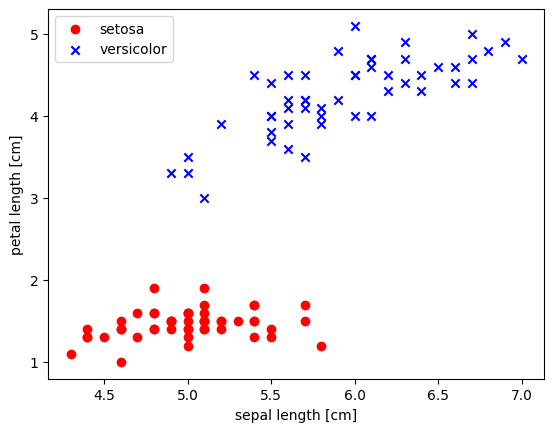

In [9]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Text(0, 0.5, 'Number of updates')

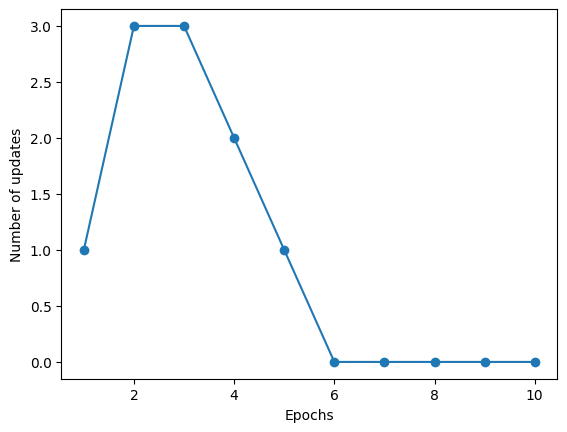

In [10]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit (X, y)
plt.plot(range (1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

In [11]:
# a small convinience function to plot decision regions
from matplotlib.colors import ListedColormap

In [12]:
def plot_decision_regions (X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/tmp/ipykernel_4960/4099773436.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


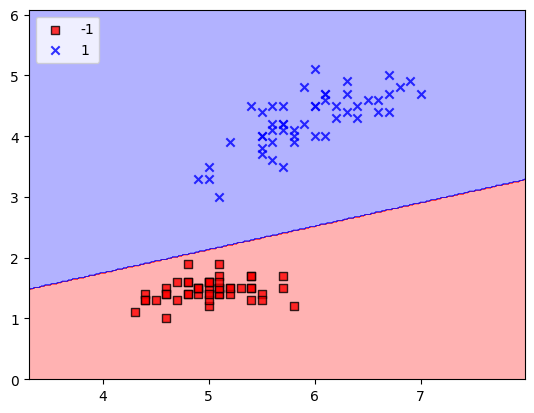

In [13]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel=('sepal length [cm]')
plt.ylabel=('petal length [cm]')
plt.legend(loc='upper left')